In [1]:
import collections
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from pprint import pprint

In [2]:
plt.rcParams["figure.figsize"] = [12., 6.]

In [3]:
g = nx.read_edgelist('../network/edge_list.txt', 
                     create_using=nx.DiGraph(), nodetype=int, data=False)
er_g = nx.erdos_renyi_graph(g.number_of_nodes(), 0.01, directed=True)
ba_g = nx.barabasi_albert_graph(g.number_of_nodes(), g.number_of_nodes() - 1)

# Nodes, edges and selfloops

In [4]:
print 'Original Network, Number of nodes: ' + str(g.number_of_nodes())
print 'Original Network, Number of edges: ' + str(g.number_of_edges())
print 'Original Network, Number of selfloops: ' + str(g.number_of_selfloops())
print u'\nErdős–Rényi Network, Number of nodes: ' + str(er_g.number_of_nodes())
print u'Erdős–Rényi Network, Number of edges: ' + str(er_g.number_of_edges())
print u'Erdős–Rényi Network, Number of selfloops: ' + str(er_g.number_of_selfloops())
print u'\nBarabási–Albert Network, Number of nodes: ' + str(ba_g.number_of_nodes())
print u'Barabási–Albert Network, Number of edges: ' + str(ba_g.number_of_edges())
print u'Barabási–Albert Network, Number of selfloops: ' + str(ba_g.number_of_selfloops())

Original Network, Number of nodes: 19797
Original Network, Number of edges: 226760
Original Network, Number of selfloops: 0

Erdős–Rényi Network, Number of nodes: 19797
Erdős–Rényi Network, Number of edges: 3920583
Erdős–Rényi Network, Number of selfloops: 0

Barabási–Albert Network, Number of nodes: 19797
Barabási–Albert Network, Number of edges: 19796
Barabási–Albert Network, Number of selfloops: 0


# Degree analysis

### In-degree distribution

Original network in-degree: max = 1482, min = 0, avg = 11
Erdős–Rényi network in-degree: 259, min = 144, avg = 198


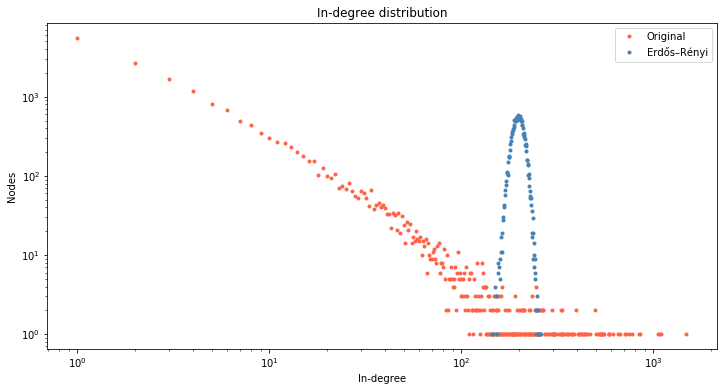

In [5]:
in_degrees = collections.Counter(d for n, d in g.in_degree())
in_degrees = [in_degrees.get(i, 0) for i in range(max(in_degrees) + 1)]
max_d = max(list(d for n, d in g.in_degree()))
min_d = min(list(d for n, d in g.in_degree()))

print 'Original network in-degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in g.in_degree()))/len(list(d for n, d in g.in_degree())))

plt.plot(range(0, len(in_degrees)), in_degrees, '.', color='tomato', 
         label='Original')

in_degrees = collections.Counter(d for n, d in er_g.in_degree())
in_degrees = [in_degrees.get(i, 0) for i in range(max(in_degrees) + 1)]
max_d = max(list(d for n, d in er_g.in_degree()))
min_d = min(list(d for n, d in er_g.in_degree()))

print u'Erdős–Rényi network in-degree: ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in er_g.in_degree()))/len(list(d for n, d in er_g.in_degree())))
    
plt.plot(range(0, len(in_degrees)), in_degrees, '.', color='steelblue', 
         label=u'Erdős–Rényi')
plt.loglog()

plt.title(u'In-degree distribution')
plt.xlabel('In-degree')
plt.ylabel('Nodes')
plt.legend()
plt.show()

### Out-degree distribution

Original network out-degree: max = 1934, min = 0, avg = 11
Erdős–Rényi network out-degree: max = 255, min = 145, avg = 198


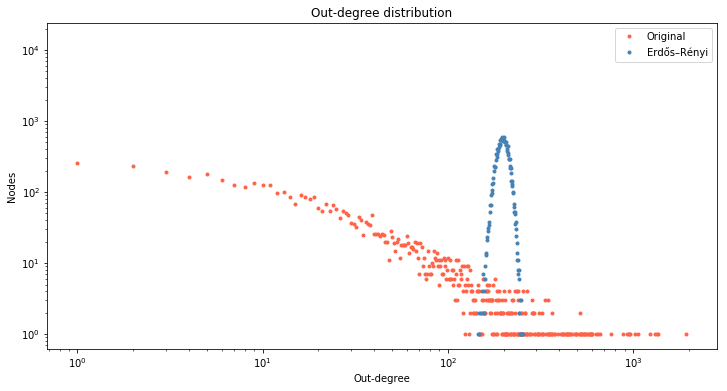

In [6]:
out_degrees = collections.Counter(d for n, d in g.out_degree())
out_degrees = [out_degrees.get(i, 0) for i in range(max(out_degrees) + 1)]
max_d = max(list(d for n, d in g.out_degree()))
min_d = min(list(d for n, d in g.out_degree()))

print 'Original network out-degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in g.out_degree()))/len(list(d for n, d in g.out_degree())))

plt.plot(range(0, len(out_degrees)), out_degrees, '.', color='tomato',
        label='Original')

out_degrees = collections.Counter(d for n, d in er_g.out_degree())
out_degrees = [out_degrees.get(i, 0) for i in range(max(out_degrees) + 1)]
max_d = max(list(d for n, d in er_g.out_degree()))
min_d = min(list(d for n, d in er_g.out_degree()))

print u'Erdős–Rényi network out-degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in er_g.out_degree()))/len(list(d for n, d in er_g.out_degree())))

plt.plot(range(0, len(out_degrees)), out_degrees, '.', color='steelblue',
        label=u'Erdős–Rényi')
plt.loglog()
plt.title(u'Out-degree distribution')
plt.xlabel('Out-degree')
plt.ylabel('Nodes')
plt.legend()
plt.show()

### Degree distribution

Original network degree: max = 2485, min = 1, avg = 22
Erdős–Rényi network degree: max = 485, min = 325, avg = 396
Barabási–Albert network degree: max = 19796, min = 1, avg = 1


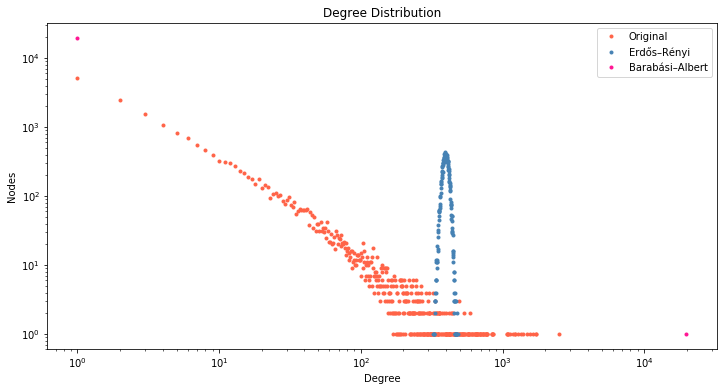

In [7]:
hist = nx.degree_histogram(g)
max_d = max(list(d for n, d in g.degree()))
min_d = min(list(d for n, d in g.degree()))

print 'Original network degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in g.degree()))/len(list(d for n, d in g.degree())))

plt.plot(range(0, len(hist)), hist, ".", color='tomato', label='Original')

hist = nx.degree_histogram(er_g)
max_d = max(list(d for n, d in er_g.degree()))
min_d = min(list(d for n, d in er_g.degree()))

print u'Erdős–Rényi network degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in er_g.degree()))/len(list(d for n, d in er_g.degree())))

plt.plot(range(0, len(hist)), hist, ".", color='steelblue', label=u'Erdős–Rényi')

hist = nx.degree_histogram(ba_g)
max_d = max(list(d for n, d in ba_g.degree()))
min_d = min(list(d for n, d in ba_g.degree()))

print u'Barabási–Albert network degree: max = ' + str(max_d) + \
    ', min = ' + str(min_d) + ', avg = ' + \
    str(sum(list(d for n, d in ba_g.degree()))/len(list(d for n, d in ba_g.degree())))

plt.plot(range(0, len(hist)), hist, ".", color='deeppink', label=u'Barabási–Albert')

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.legend()
plt.loglog()
plt.show()

# Connectivity analysis

### Type of connectivity

In [8]:
if nx.is_strongly_connected(g):
    print 'The original network is strongly connected with ' + \
        str(nx.number_strongly_connected_components(g)) + ' strongly ' \
        'connected components'
elif nx.is_weakly_connected(g):
    print 'The original network is weakly connected with ' + \
        str(nx.number_weakly_connected_components(g)) + ' weakly connected' \
        ' components'
else:
    print 'The original network is neither strongly connected nor weakly connected'

if nx.is_strongly_connected(er_g):
    print u'The Erdős–Rényi network is strongly connected with ' + \
        str(nx.number_strongly_connected_components(er_g)) + ' strongly ' \
        'connected components'
elif nx.is_weakly_connected(er_g):
    print u'The Erdős–Rényi is weakly connected with ' + \
        str(nx.number_weakly_connected_components(er_g)) + ' weakly connected' \
        ' components'
else:
    print u'The Erdős–Rényi is neither strongly connected nor weakly connected'

if nx.is_connected(ba_g):
    print u'The Barabási–Albert network is connected with ' + \
        str(nx.number_connected_components(ba_g)) + \
        ' connected components'
else:
    print u'The Barabási–Albert is not connected'

The original network is neither strongly connected nor weakly connected
The Erdős–Rényi network is strongly connected with 1 strongly connected components
The Barabási–Albert network is connected with 1 connected components


### Connected components distribution

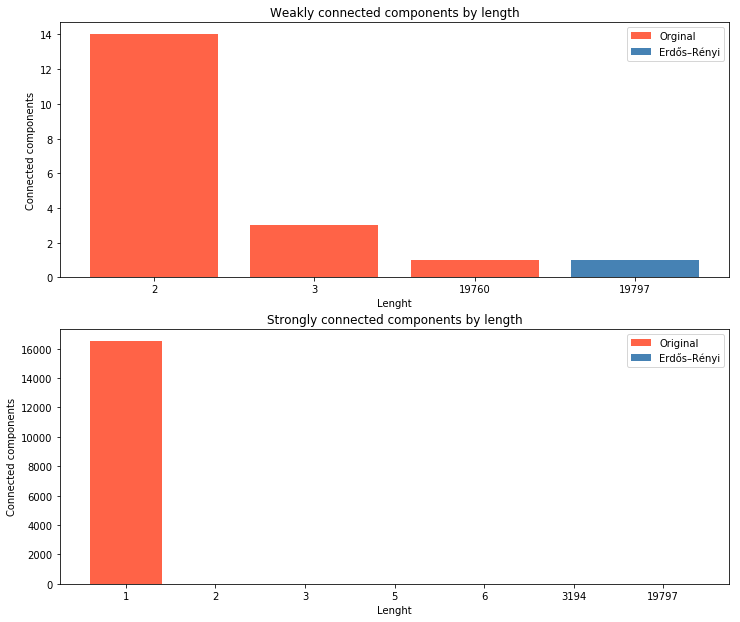

In [9]:
g_weak = collections.Counter(len(c) for c in nx.weakly_connected_components(g))
g_strong = collections.Counter(len(c) for c in nx.strongly_connected_components(g))
er_weak = collections.Counter(len(c) for c in nx.weakly_connected_components(er_g))
er_strong = collections.Counter(len(c) for c in nx.strongly_connected_components(er_g))

x_weak = list(np.union1d(g_weak.keys(), er_weak.keys()))
x_strong = list(np.union1d(g_strong.keys(), er_strong.keys()))

plt.subplot(211)
plt.bar(range(len(x_weak)), [g_weak[k] if k in g_weak else 0 for k in x_weak], 
       color='tomato', label='Orginal')
plt.bar(range(len(x_weak)), [er_weak[k] if k in er_weak else 0 for k in x_weak],
       color='steelblue', label=u'Erdős–Rényi')
plt.xticks(range(len(x_weak)), x_weak)
plt.title('Weakly connected components by length')
plt.xlabel('Lenght')
plt.ylabel('Connected components')
plt.legend()

plt.subplot(212)
plt.bar(range(len(x_strong)), [g_strong[k] if k in g_strong else 0 for k in x_strong],
       color='tomato', label='Original')
plt.bar(range(len(x_strong)), [er_strong[k] if k in er_strong else 0 for k in x_strong],
       color='steelblue', label=u'Erdős–Rényi')
plt.xticks(range(len(x_strong)), x_strong)
plt.title('Strongly connected components by length')
plt.xlabel('Lenght')
plt.ylabel('Connected components')
plt.legend()
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=1.4, wspace=0.2,
                   hspace=0.2)
plt.show()

# Density

In [10]:
print "The Original network's density is " + str(nx.density(g))
print u"The Erdős–Rényi network's density is " + str(nx.density(er_g))
print u"The Barabási–Albert network's density is " + str(nx.density(ba_g))

The Original network's density is 0.000578614909405
The Erdős–Rényi network's density is 0.0100040032517
The Barabási–Albert network's density is 0.00010102540789


# Closeness centrality

1000 nodes parsed, continue?(Y/N) N


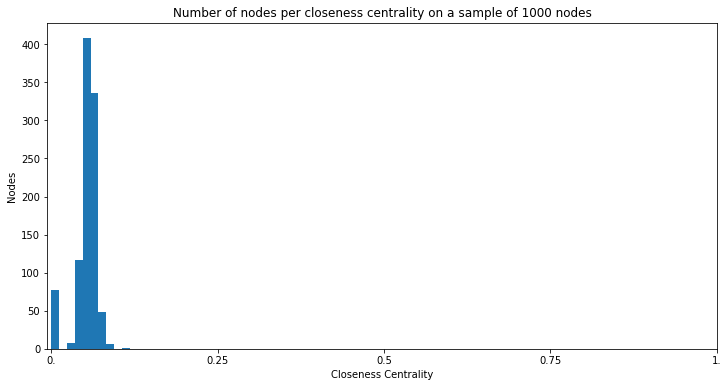

In [11]:
nodes = g.node.items()
clos_cent = list()
counter = 0

for node in nodes:
    clos_cent.append(nx.closeness_centrality(g, node[0]))
    counter += 1
    
    if counter % 1000 == 0:
        if raw_input(str(counter) + ' nodes parsed, continue?(Y/N) ') == 'N':
            break

clos_cent = sorted(clos_cent)

plt.hist(clos_cent)
plt.title('Number of nodes per closeness centrality on a sample of ' \
          + str(counter) + ' nodes')
plt.xticks([0., 0.25, 0.5, 0.75, 1.], ['0.', '0.25', '0.5', '0.75', '1.'])
plt.xlabel('Closeness Centrality')
plt.ylabel('Nodes')
plt.show()

# Betweenness Centrality

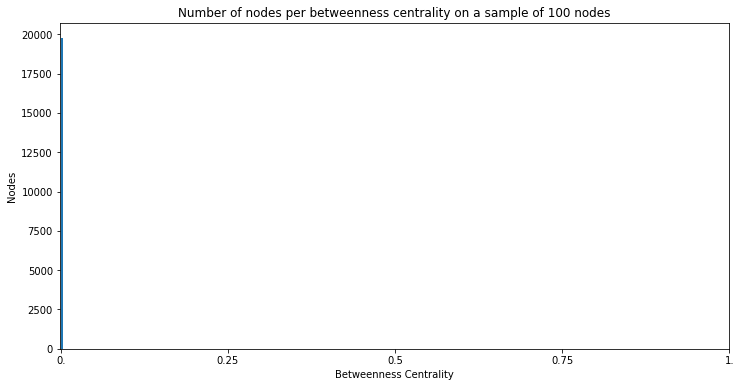

In [12]:
k = 100
bet_cent = sorted(nx.betweenness_centrality(g, k=k).values())

plt.hist(bet_cent)
plt.title('Number of nodes per betweenness centrality on a sample of ' \
          + str(k) + ' nodes')
plt.xticks([0., 0.25, 0.5, 0.75, 1.], ['0.', '0.25', '0.5', '0.75', '1.'])
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.show()

# Neighbors

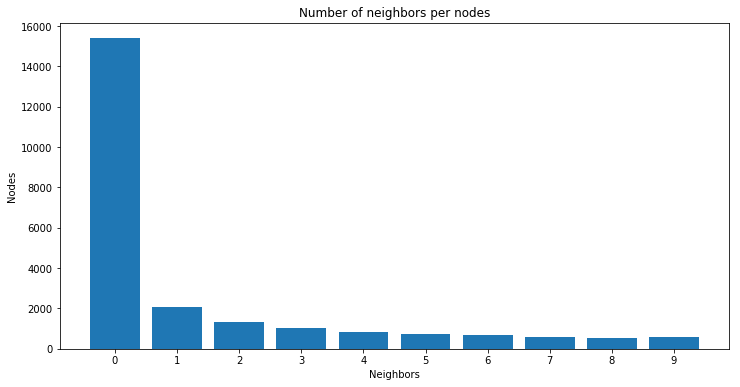

In [13]:
num_of_nei = collections.Counter()

for node in g.nodes:
    num_of_nei.update(str(len(list(g.neighbors(node)))))

plt.bar([k for k in sorted(num_of_nei.keys())],
       [num_of_nei[k] for k in sorted(num_of_nei.keys())])
plt.title('Number of neighbors per nodes')
plt.xticks([int(k) for k in sorted(num_of_nei.keys())], 
           [k for k in sorted(num_of_nei.keys())])
plt.xlabel('Neighbors')
plt.ylabel('Nodes')
plt.show()